# CNN Architectures

In this notebook, we are going to implement a state-of-the-art convolutional neural network. You can use PyTorch, Keras, or TensorFlow for this purpose. However, you should provide a summary of the created network at the end. You have to implement an architecture between AlexNet and VGG19 and another architecture between Resnet50 and Inception v1.

## [VGG19 Architecture ](https://arxiv.org/pdf/1409.1556.pdf)

[![VGG19](https://drive.google.com/uc?export=view&id=1OfQ65ZJvvQuB8VaQevsjyPisEGyg33aR)](https://drive.google.com/uc?export=view&id=1OfQ65ZJvvQuB8VaQevsjyPisEGyg33aR)



## [AlexNet Architecture](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)


[![AlexNet](https://drive.google.com/uc?export=view&id=1Z_JHW6Q9maJNpf2QoK4XZwnLuzQ65N_e)](https://drive.google.com/uc?export=view&id=1Z_JHW6Q9maJNpf2QoK4XZwnLuzQ65N_e)

## [Resnet50 Architecture](https://arxiv.org/abs/1512.03385)

[![Resnet50](https://drive.google.com/uc?export=view&id=1-Mf2GAJucjedrobJvd_A6D9gcD1_oETx)](https://drive.google.com/uc?export=view&id=1-Mf2GAJucjedrobJvd_A6D9gcD1_oETx)

## [Inception v1 Architecture](https://arxiv.org/abs/1409.4842)

[![Inception v1](https://drive.google.com/uc?export=view&id=1lkliKrhY5mZh-2Exv4be7yIr2QPOw4Gp)](https://drive.google.com/uc?export=view&id=1lkliKrhY5mZh-2Exv4be7yIr2QPOw4Gp)

In [47]:
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2
import urllib
import requests
import PIL.Image
import numpy as np
from bs4 import BeautifulSoup


## **First Implementation:**

In [48]:
import torch
import torch.nn as nn

# Defining the AlexNet architecture in PyTorch
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
alexnet_model = AlexNet(num_classes=1000)

# Display the model architecture
alexnet_model


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## **Second Implementation:**

In [49]:
# Defining the ResNet architecture in PyTorch

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False
        )
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(
            planes, planes, kernel_size=3, stride=1, padding=1, bias=False
        )
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False
                ),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = torch.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.maxpool(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# Model configuration for ResNet with BasicBlock
# The list defines the number of blocks in each of the four layers of the ResNet.
# For a custom ResNet-like structure the list can be adjusted.
num_blocks = [2, 3, 5, 2]

resnet_model = ResNet(BasicBlock, num_blocks, num_classes=1000)

# Display the model architecture
resnet_model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

## Auxiliary code to check the created model.

In [50]:
from torchvision import models
alexnet = models.alexnet(pretrained=True)
vgg19 = models.vgg19(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
inceptionv3 = models.inception_v3(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  w

In [51]:
import io
import sys

def capture_model_print(model):
    old_stdout = sys.stdout
    sys.stdout = buffer = io.StringIO()
    print(model)
    sys.stdout = old_stdout
    return buffer.getvalue()

alexnet_model = AlexNet(num_classes=1000)
custom_model = capture_model_print(alexnet_model)
pytorch_model = capture_model_print(alexnet)

if custom_model == pytorch_model:
    print("The models have identical structures.")
else:
    print("The models structures differ.")

The models structures differ.


# Dataset and Training

Now we are going to train one of the implemented networks. For this, we will use the CIFAR-10 dataset. This dataset is composed of 10 classes but we will only use 3.

In [52]:
#@title Imports
import glob
import random
import numpy as np
import pandas as pd

import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
#@title Dataset

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize to [-1, 1] range
])

def filter_indices_with_limits(dataset, class_sample_limits):
    indices = []
    class_counts = {cls: 0 for cls in class_sample_limits.keys()}
    for i in range(len(dataset)):
        _, label = dataset[i]
        class_name = dataset.classes[label]
        if class_name in class_sample_limits:
            if class_counts[class_name] < class_sample_limits[class_name]:
                indices.append(i)
                class_counts[class_name] += 1
            if all(class_counts[cls] >= limit for cls, limit in class_sample_limits.items()):
                break
    return indices


trainset = datasets.CIFAR10(root='CIFAR10_data/', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='CIFAR10_data/', train=False, download=True, transform=transform)

train_limits = {'airplane': 500, 'automobile': 500, 'bird': 50}
test_limits = {'airplane': 100, 'automobile': 100, 'bird': 100}

train_indices = filter_indices_with_limits(trainset, train_limits)
trainset_filtered = Subset(trainset, train_indices)

test_indices = filter_indices_with_limits(testset, test_limits)
testset_filtered = Subset(testset, test_indices)

trainloader = DataLoader(trainset_filtered, batch_size=64, shuffle=True)
testloader = DataLoader(testset_filtered, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


## Data Augmentation

As you can see, we have a dataset that is not balanced. The `bird` class only has 50 samples, while `airplane` and `automobile` have 500. In this section, you will need to implement a data augmentation technique to solve this problem in our dataset.

You can find examples of different techniques at the following link:

1. [Getting started with transforms v2](https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py)
2. [Transforming and augmenting images](https://pytorch.org/vision/stable/transforms.html)


### **Apply Data Augmentation**

In [54]:
# Define transformations for the 'bird' class and the other classes
augment_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),  # Slight rotation to avoid unrealistic orientations
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Mild color jitter
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Slight translation
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.99, 1.01)),  # Keeping the aspect ratio almost same
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

original_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

class CustomCIFAR10(datasets.CIFAR10):
    def __init__(self, *args, class_sample_limits=None, **kwargs):
        # Ensure no transform is passed to the base class
        kwargs['transform'] = None
        super().__init__(*args, **kwargs)
        self.class_sample_limits = class_sample_limits
        self.class_counts = {cls: 0 for cls in self.class_sample_limits.keys()}
        self.indices = []
        for i in range(super().__len__()):
            _, label = super().__getitem__(i)
            class_name = self.classes[label]
            if class_name in self.class_sample_limits and self.class_counts[class_name] < self.class_sample_limits[class_name]:
                self.indices.append(i)
                self.class_counts[class_name] += 1

    def __getitem__(self, index):
        image, label = super().__getitem__(self.indices[index])
        class_name = self.classes[label]

        # Assuming the super().__getitem__() returns a PIL Image, we directly apply transforms
        if class_name == 'bird':
            image = augment_transforms(image)
        else:
            image = original_transform(image)

        return image, label


    def __len__(self):
        return len(self.indices)

# Initialize the custom datasets without passing transform
trainset_custom = CustomCIFAR10(root='CIFAR10_data/', train=True, download=True, class_sample_limits=train_limits)
testset_custom = CustomCIFAR10(root='CIFAR10_data/', train=False, download=True, class_sample_limits=test_limits)

# Create data loaders
trainloader_custom = DataLoader(trainset_custom, batch_size=64, shuffle=True)
testloader_custom = DataLoader(testset_custom, batch_size=64, shuffle=True)



Files already downloaded and verified
Files already downloaded and verified


# Fine-Tunning

Now we are going to perform fine-tuning on the two architectures that have been implemented.

In [55]:
# We will set the device to CPU for now. If running on a machine with a GPU, set this to 'cuda'.
device = torch.device('cuda')

# For AlexNet
alexnet_model = alexnet_model  # Use the AlexNet model instance created earlier
num_ftrs_alexnet = alexnet_model.classifier[6].in_features
alexnet_model.classifier[6] = nn.Linear(num_ftrs_alexnet, 3)  # Modify the classifier for 3 classes

# For ResNet
resnet_model = resnet_model  # Use the ResNet model instance created earlier
num_ftrs_resnet = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs_resnet, 3)  # Modify the fully connected layer for 3 classes

# Move the models to the device (CPU or GPU)
alexnet_model = alexnet_model.to(device)
resnet_model = resnet_model.to(device)

# Return both models as a dictionary for clarity
{'alexnet_model': alexnet_model, 'resnet_model': resnet_model}

{'alexnet_model': AlexNet(
   (features): Sequential(
     (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
     (1): ReLU(inplace=True)
     (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
     (4): ReLU(inplace=True)
     (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (7): ReLU(inplace=True)
     (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (9): ReLU(inplace=True)
     (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (11): ReLU(inplace=True)
     (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
   (classifier): Sequential(
     (0): Dropout(p=0.5, inplace=False)
     (1): Linear(in_features=

In [56]:
#@title Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [57]:
#@title Training
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader_custom:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader_custom)}")

Epoch 1, Loss: 0.04596196191714091
Epoch 2, Loss: 0.028974344789543572
Epoch 3, Loss: 0.021463138133506563
Epoch 4, Loss: 0.015022107098689851
Epoch 5, Loss: 0.024925784481798902
Epoch 6, Loss: 0.033447444877203775
Epoch 7, Loss: 0.02583207137992277
Epoch 8, Loss: 0.027416643193539453
Epoch 9, Loss: 0.022272920674260926
Epoch 10, Loss: 0.029082888463402495


In [58]:
#@title Test the model

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader_custom:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the model on the test images: {100 * correct / total}%")

Accuracy of the model on the test images: 77.66666666666667%


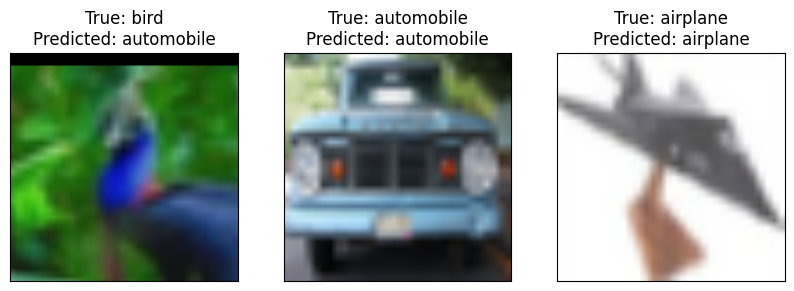

In [59]:
import matplotlib.pyplot as plt

model.eval()

# Get a batch of test images and labels
dataiter = iter(testloader_custom)
images, labels = next(dataiter)

# Make predictions
with torch.no_grad():
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs, 1)

# Function to unnormalize and plot an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

classes = trainset.classes[0:3]
fig = plt.figure(figsize=(10, 4))
for idx in range(3):
    ax = fig.add_subplot(1, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(f"True: {classes[labels[idx]]}\nPredicted: {classes[predicted[idx]]}")

plt.show()

# **Questions**

1. Describe the techniques used to balance the dataset.



Aumentación de Datos Específica por Clase: Las augment_transforms se aplican solo a las imágenes de la clase 'bird'. Esta aumentación es más agresiva en comparación con la original_transform, que se aplica a las otras clases. Este enfoque busca generar representaciones más variadas de la clase 'bird' para ayudar al modelo a aprender de un conjunto más diverso de ejemplos.

Aumento de la Variedad de Muestras: La aumentación incluye operaciones como RandomHorizontalFlip (volteo horizontal aleatorio), RandomRotation (rotación aleatoria) y RandomResizedCrop (recorte redimensionado aleatorio), que crean variaciones de las imágenes originales mediante volteos, rotaciones y recortes de diferentes maneras. Esto puede aumentar efectivamente el número de imágenes de 'bird' diferentes que el modelo ve durante el entrenamiento, aunque los datos subyacentes sigan siendo limitados.

Variaciones de Color: ColorJitter se usa para variar el brillo, contraste, saturación y tono de las imágenes de 'bird'. Esto ayuda a que el modelo se vuelva robusto ante cambios en las condiciones de iluminación y variaciones de color, lo cual es importante para la generalización.

Transformaciones Geométricas: RandomAffine con traslación altera la posición del 'bird' dentro de la imagen, lo que puede ayudar al modelo a reconocer pájaros independientemente de su posición. La ligera traslación puede simular el efecto de los pájaros moviéndose o siendo capturados desde diferentes ángulos.

Aumentación Selectiva: Al aumentar selectivamente solo la clase 'bird', el código busca equilibrar la representación de clases sin aumentar en exceso las clases ('airplane' y 'automobile') que ya tienen suficientes muestras.

Muestreo de Subconjuntos: La clase CustomCIFAR10 limita el número de muestras por clase de acuerdo con class_sample_limits. Esto ayuda a asegurar que el modelo se entrene con un número equilibrado de muestras de cada clase durante cada época.

Aleatorización en el Cargador de Datos: Los cargadores de datos están configurados para mezclar los datos (shuffle=True), lo que asegura que el modelo encuentre un orden aleatorizado de ejemplos de entrenamiento, contribuyendo aún más a una exposición equilibrada a diferentes clases durante el entrenamiento.

2. Train both networks with balanced and unbalanced datasets. How does it affect the predictions? Display a confusion matrix for each case.


Epoch 1, Loss: 0.8857221954009112
Epoch 2, Loss: 0.603498786687851
Epoch 3, Loss: 0.44961373069707083
Epoch 4, Loss: 0.3811947571880677
Epoch 5, Loss: 0.3046533176127602
Epoch 6, Loss: 0.20397829877979615
Epoch 7, Loss: 0.2081492832478355
Epoch 8, Loss: 0.13274638113730095
Epoch 9, Loss: 0.0907366205664242
Epoch 10, Loss: 0.09635855849174892
Accuracy of the model on the test images: 74.33333333333333%


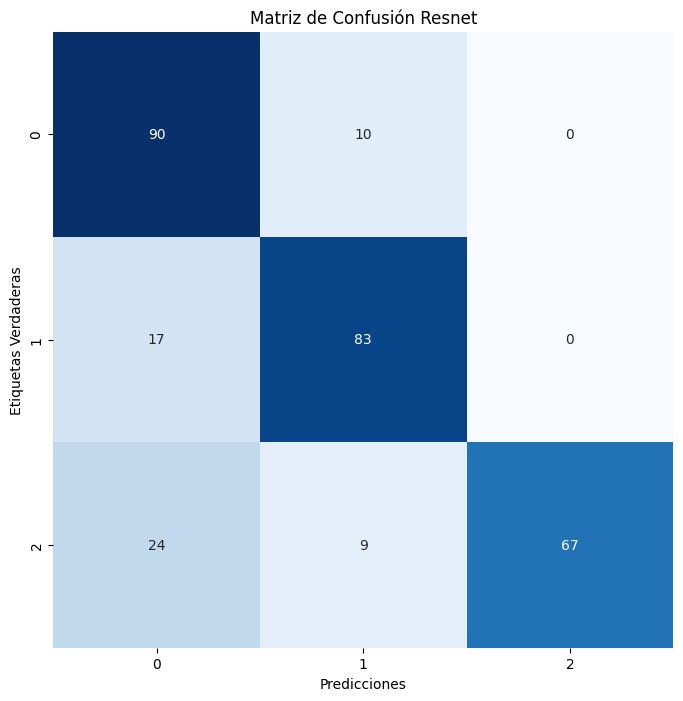

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch


model =  resnet_model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader_custom:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader_custom)}")


correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader_custom:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the model on the test images: {100 * correct / total}%")

# Asume que tienes 'testloader' y tu modelo está en 'model'
model.eval()  # Cambia el modelo a modo de evaluación

true_labels = []
pred_labels = []

with torch.no_grad():  # No es necesario calcular gradientes en la evaluación
    for images, labels in testloader_custom:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, pred_labels)

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas Verdaderas')
ax.set_title('Matriz de Confusión Resnet')
plt.show()


Epoch 1, Loss: 0.2854355728144155
Epoch 2, Loss: 0.06362808912115939
Epoch 3, Loss: 0.03919701552128091
Epoch 4, Loss: 0.029217159046846276
Epoch 5, Loss: 0.02359580881345798
Epoch 6, Loss: 0.013507133089553784
Epoch 7, Loss: 0.025946631315438187
Epoch 8, Loss: 0.033762431196758855
Epoch 9, Loss: 0.023064095348886707
Epoch 10, Loss: 0.020476178170236593
Accuracy of the model on the test images: 79.66666666666667%


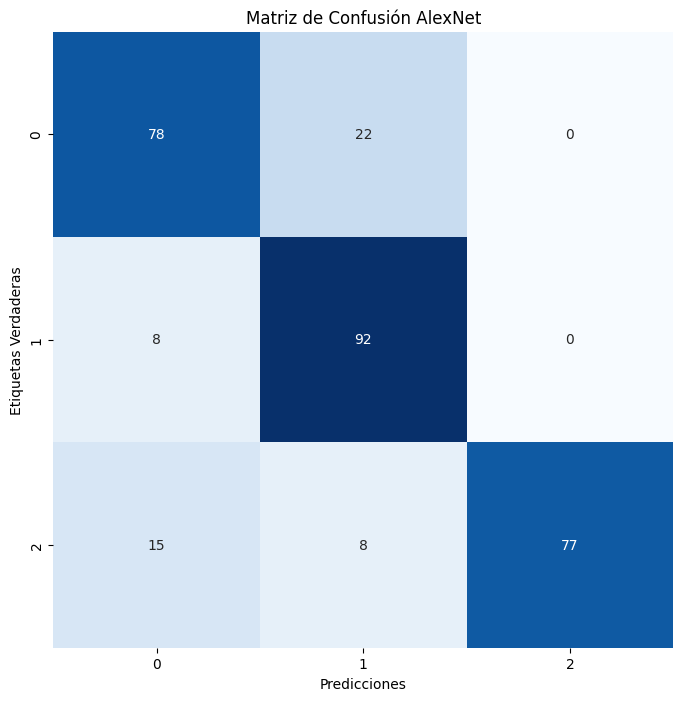

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch


resnet_model = alexnet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)


num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader_custom:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader_custom)}")



correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader_custom:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the model on the test images: {100 * correct / total}%")

# Asume que tienes 'testloader' y tu modelo está en 'model'
model.eval()  # Cambia el modelo a modo de evaluación

true_labels = []
pred_labels = []

with torch.no_grad():  # No es necesario calcular gradientes en la evaluación
    for images, labels in testloader_custom:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, pred_labels)

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas Verdaderas')
ax.set_title('Matriz de Confusión AlexNet')
plt.show()


3. Generate graphs to compare the performance of the implemented networks on the different datasets, focusing on metrics such as training/validation loss, sensitivity, specificity, f1-measure ...

In [62]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            all_predictions.extend(preds.view(-1).cpu().numpy())
            all_labels.extend(labels.view(-1).cpu().numpy())
    val_loss /= len(val_loader.dataset)

    accuracy = accuracy_score(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='macro')

    return train_loss, val_loss, accuracy, precision, recall, f1


In [63]:
# Ejemplo de estructura de datos para almacenar métricas
metrics = {
    'alexnet': {'train_loss': [], 'val_loss': [], 'accuracy': [], 'precision': [], 'recall':[], 'f1': []},
    'resnet': {'train_loss': [], 'val_loss': [], 'accuracy': [], 'precision': [], 'recall':[], 'f1': []}
}

num_epochs = 10

# Ejemplo de cómo ajustar el modelo y recopilar métricas por época
for epoch in range(num_epochs):
    # Ajustar los argumentos faltantes: criterion, optimizer, y device
    train_loss, val_loss, accuracy, precision, recall, f1 = train_and_evaluate_model(
        model, trainloader_custom, testloader_custom, criterion, optimizer, device)

    metrics['alexnet']['train_loss'].append(train_loss)
    metrics['alexnet']['val_loss'].append(val_loss)
    metrics['alexnet']['accuracy'].append(accuracy)
    metrics['alexnet']['precision'].append(precision)
    metrics['alexnet']['recall'].append(recall)
    metrics['alexnet']['f1'].append(f1)

# Ejemplo de cómo ajustar el modelo y recopilar métricas por época
for epoch in range(num_epochs):
    # Ajustar los argumentos faltantes: criterion, optimizer, y device
    train_loss, val_loss, accuracy, precision, recall, f1 = train_and_evaluate_model(
        model, trainloader_custom, testloader_custom, criterion, optimizer, device)

    metrics['resnet']['train_loss'].append(train_loss)
    metrics['resnet']['val_loss'].append(val_loss)
    metrics['resnet']['accuracy'].append(accuracy)
    metrics['resnet']['precision'].append(precision)
    metrics['resnet']['recall'].append(recall)
    metrics['resnet']['f1'].append(f1)


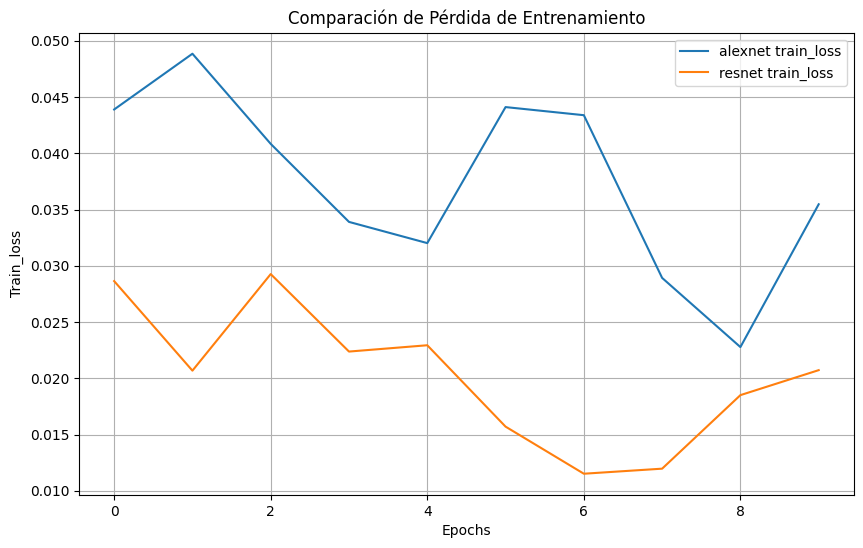

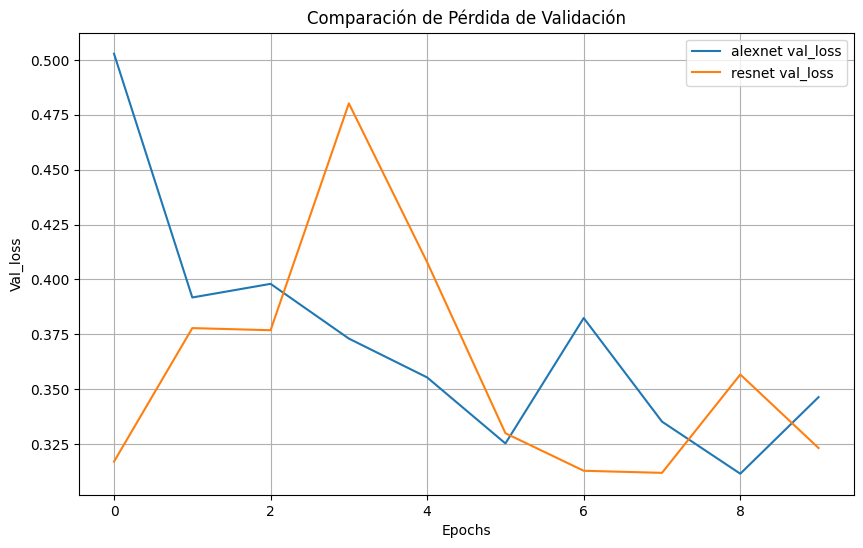

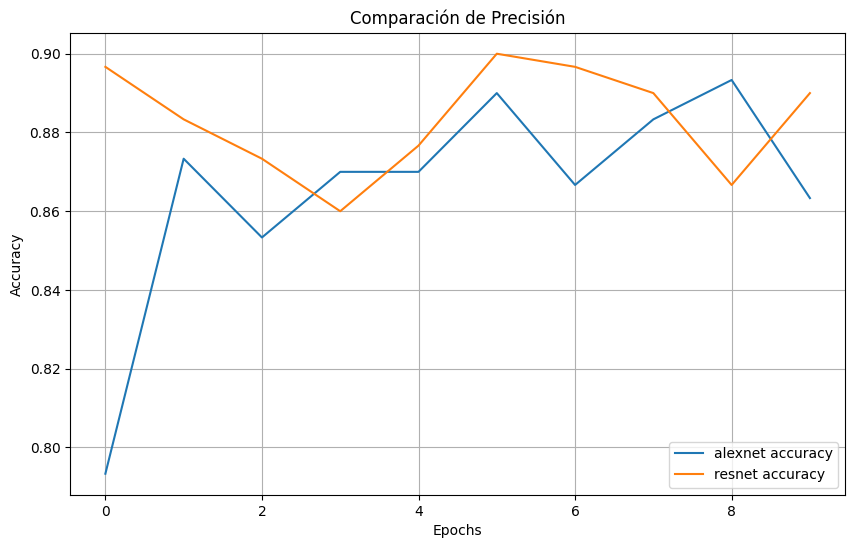

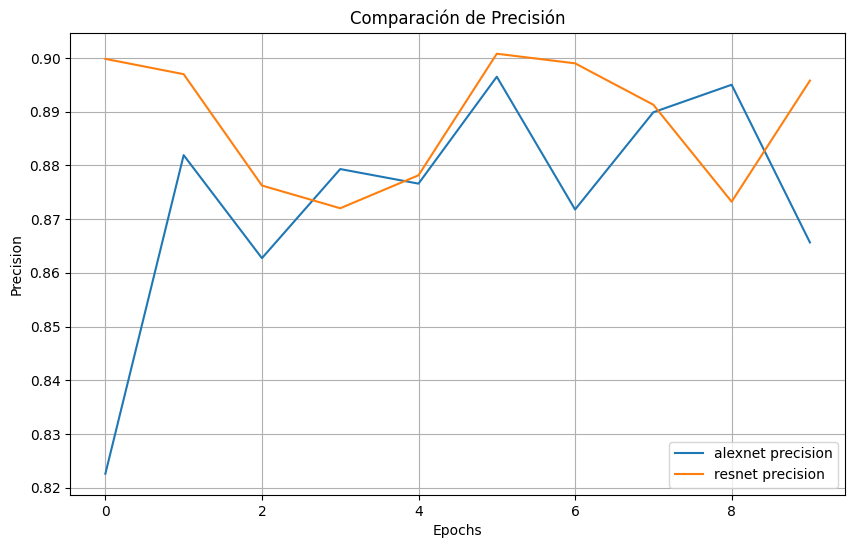

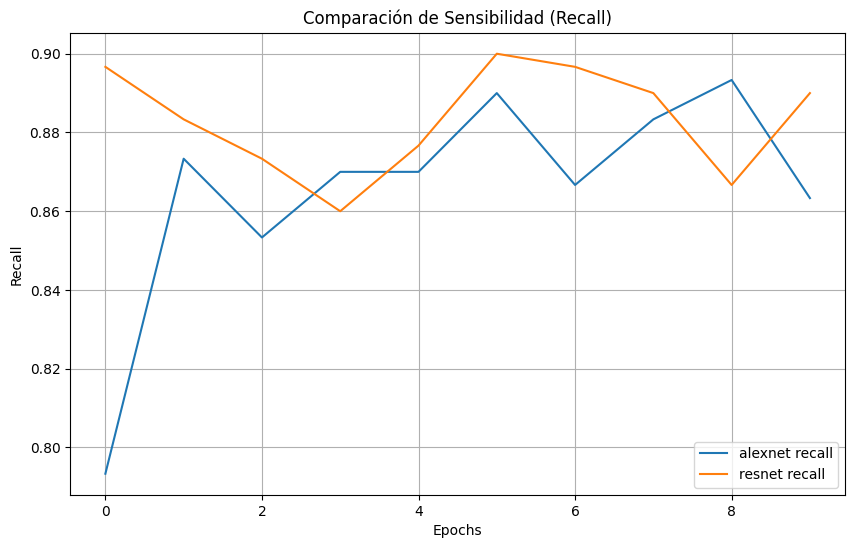

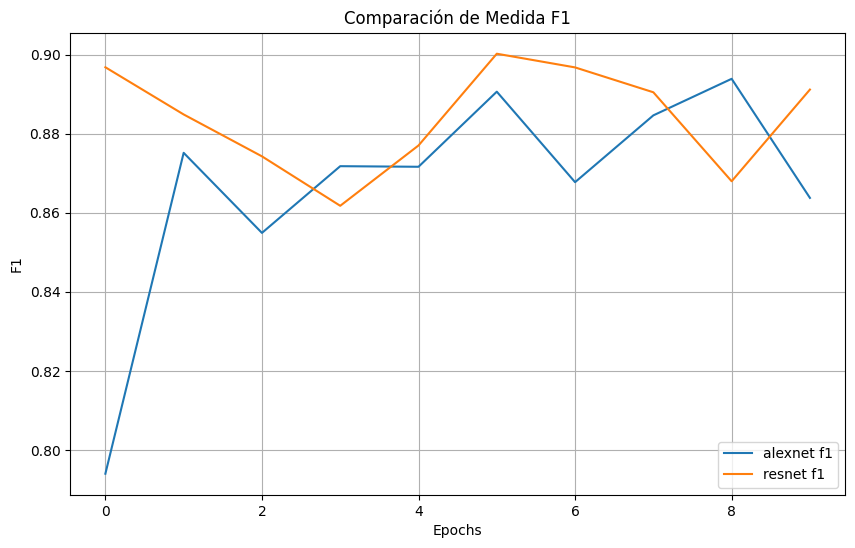

In [64]:
import matplotlib.pyplot as plt

# Función para graficar las métricas de entrenamiento y validación
def plot_metric(metric_name, title):
    plt.figure(figsize=(10, 6))
    for model_name, model_metrics in metrics.items():
        plt.plot(model_metrics[metric_name], label=f'{model_name} {metric_name}')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar pérdida de entrenamiento y validación
plot_metric('train_loss', 'Comparación de Pérdida de Entrenamiento')
plot_metric('val_loss', 'Comparación de Pérdida de Validación')

# Graficar precisión, sensibilidad (recall) y medida F1
plot_metric('accuracy', 'Comparación de Precisión')
plot_metric('precision', 'Comparación de Precisión')
plot_metric('recall', 'Comparación de Sensibilidad (Recall)')
plot_metric('f1', 'Comparación de Medida F1')
